# Logistic Regression in Python Example
### Logistic regression is a popular machine learning algorithm used for binary classification tasks. In this example, we'll walk through the process of implementing logistic regression in Python using the scikit-learn library.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# import & analyze data set

In [2]:
#import data set
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

# remove deck column

In [10]:
df.drop('deck', axis= 1, inplace = True)

In [11]:
df.sample(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
463,0,2,male,48.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
232,0,2,male,59.0,0,0,13.5000,S,Second,man,True,Southampton,no,True
429,1,3,male,32.0,0,0,8.0500,S,Third,man,True,Southampton,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,Southampton,no,False
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
459,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,Queenstown,no,True
604,1,1,male,35.0,0,0,26.5500,C,First,man,True,Cherbourg,yes,True


# impute the missing values

In [12]:
df['age'].mean()

29.69911764705882

In [13]:
df.age.median()

28.0

In [14]:
df['age'] = df['age'].fillna(df['age'].median())


In [15]:
df.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [16]:
df.embark_town.mode()[0]

'Southampton'

In [17]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [18]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [19]:
df.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
536,0,1,male,45.0,0,0,26.55,S,First,man,True,Southampton,no,True
842,1,1,female,30.0,0,0,31.00,C,First,woman,False,Cherbourg,yes,True


In [20]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# encoding the data

In [21]:
for col in df.columns:
    print(col)

survived
pclass
sex
age
sibsp
parch
fare
embarked
class
who
adult_male
embark_town
alive
alone


In [22]:
for col in df.columns:
    if df[col].dtypes == 'object' or df[col].dtypes == 'category':
        print(col)

sex
embarked
class
who
embark_town
alive


In [23]:
for col in df.columns:
    if df[col].dtypes == 'object' or df[col].dtypes == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


# split the data

In [24]:
features = df.drop('survived' , axis = 1)
target = df['survived']

In [25]:
features.shape

(891, 13)

In [26]:
target.shape

(891,)

In [27]:
features

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,1,1,True,2,0,True
887,1,0,19.0,0,0,30.0000,2,0,2,False,2,1,True
888,3,0,28.0,1,2,23.4500,2,2,2,False,2,0,False
889,1,1,26.0,0,0,30.0000,0,0,1,True,0,1,True


In [28]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

# train test split

In [29]:
X_train , X_test , y_train , y_test = train_test_split(features , target , test_size = 0.2 , random_state = 42)

In [30]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
331,1,1,45.5,0,0,28.5000,2,0,1,True,2,0,True
733,2,1,23.0,0,0,13.0000,2,1,1,True,2,0,True
382,3,1,32.0,0,0,7.9250,2,2,1,True,2,0,True
704,3,1,26.0,1,0,7.8542,2,2,1,True,2,0,False
813,3,0,6.0,4,2,31.2750,2,2,0,False,2,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2,2,2,False,2,1,True
270,1,1,28.0,0,0,31.0000,2,0,1,True,2,0,True
860,3,1,41.0,2,0,14.1083,2,2,1,True,2,0,False
435,1,0,14.0,1,2,120.0000,2,0,0,False,2,1,False


In [34]:
model = LogisticRegression(max_iter =1000)

In [35]:
model.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

# evaluating the model & accuracy

In [38]:
coefficient = model.coef_
intercept = model.intercept_

In [39]:
MSE =  mean_squared_error(y_test, y_pred )
R2 = r2_score(y_test, y_pred )
RMSE =  np.sqrt(mean_squared_error(y_test, y_pred ))
print( 'MSE=', MSE)
print('R2=' , R2)
print('RMSE=' , RMSE)

MSE= 0.0
R2= 1.0
RMSE= 0.0


In [40]:
accuracy = int(R2*100)

In [41]:
print('accuracy=' , accuracy, '%')

accuracy= 100 %


In [42]:
X_test['predicted survival'] = y_pred

In [43]:
X_test    # with predicted column

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,predicted survival
709,3,1,28.0,1,1,15.2458,0,2,1,True,0,1,False,1
439,2,1,31.0,0,0,10.5000,2,1,1,True,2,0,True,0
840,3,1,20.0,0,0,7.9250,2,2,1,True,2,0,True,0
720,2,0,6.0,0,1,33.0000,2,1,0,False,2,1,False,1
39,3,0,14.0,1,0,11.2417,0,2,0,False,0,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2,2,1,True,2,0,True,0
773,3,1,28.0,0,0,7.2250,0,2,1,True,0,0,True,0
25,3,0,38.0,1,5,31.3875,2,2,2,False,2,1,False,1
84,2,0,17.0,0,0,10.5000,2,1,2,False,2,1,True,1


In [44]:
pd.DataFrame({"Original":y_test,'pred':y_pred,"error":y_test-y_pred})

,Original,pred,error
709,1,1,0
439,0,0,0
840,0,0,0
720,1,1,0
39,1,1,0
...,...,...,...
433,0,0,0
773,0,0,0
25,1,1,0
84,1,1,0


### Evaluating the Model

In [45]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
ClassificationReport =  classification_report(y_test, y_pred)

print('Confusion Matrix: \n', ConfusionMatrix)
print('Classification Report: \n', ClassificationReport)

Confusion Matrix: 
 [[105   0]
 [  0  74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



## Visualization of our results

Text(95.72222222222221, 0.5, 'Actual')

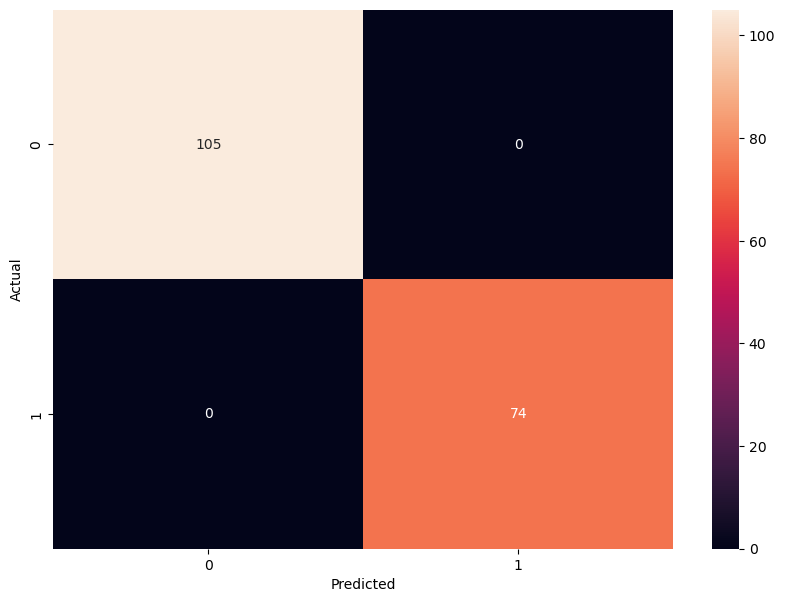

In [46]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(ConfusionMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [47]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



## Save the Model

In [48]:
import pickle

# Save the model to disk
with open('logistic_regression_model_Titanic_dataset.pkl', 'wb') as file:
    pickle.dump(model, file)
